In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [4]:
heart_data1=pd.read_csv('file.csv')
heart_data2=pd.read_csv('cleveland.csv')

In [5]:
#0 absence diagnosis, 1 presence diagnosis
Diagnosis={1:0,2:1}
heart_data1['Diagnosis']= heart_data1['Diagnosis'].map(Diagnosis) 

In [6]:
Diagnosis={0:0,1:1,2:1,3:1,4:1}
heart_data2['Diagnosis']= heart_data2['Diagnosis'].map(Diagnosis) 

In [7]:
frames = [heart_data1, heart_data2]
data = pd.concat(frames)
data.count()

age                   573
sex                   573
cp                    573
restbps               573
chol                  573
fbs                   573
restecg               573
maximum_heart_rate    573
exang                 573
oldpeak               573
slope                 573
major_vessels         569
thal                  571
Diagnosis             573
dtype: int64

# EDA

<AxesSubplot:>

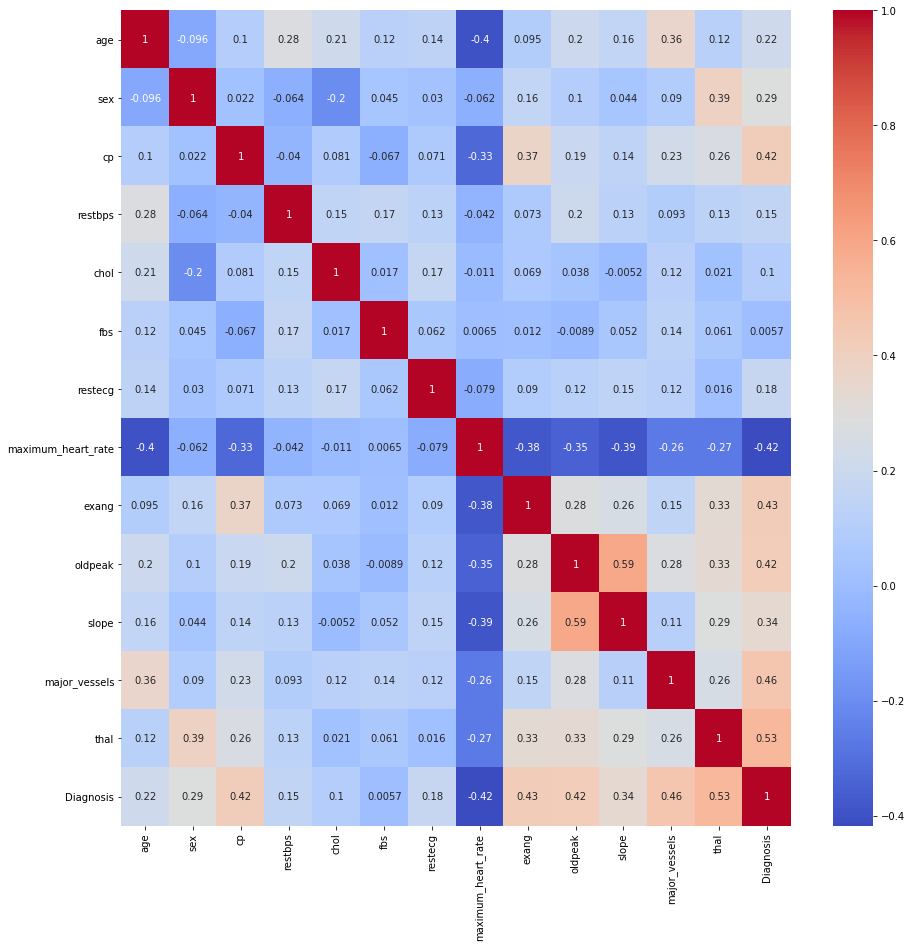

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

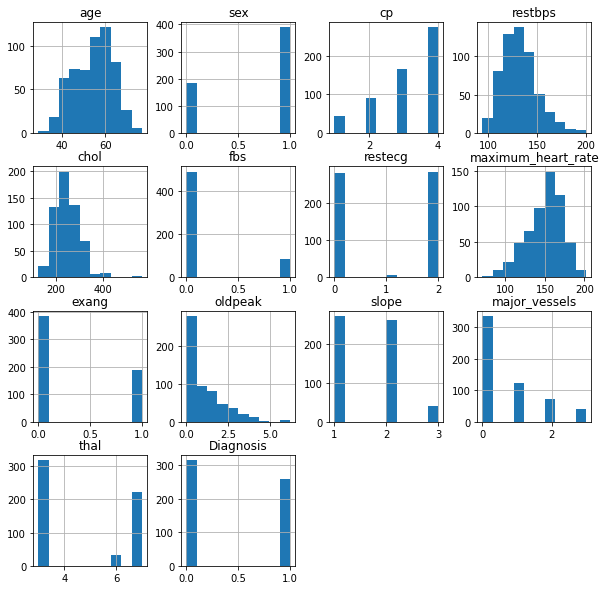

In [9]:
data.hist(figsize=(10,10),layout=(4,4))
plt.show()

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

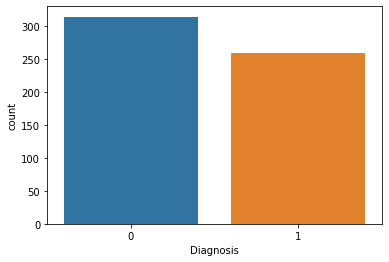

In [10]:
sns.countplot(x="Diagnosis", data=data)

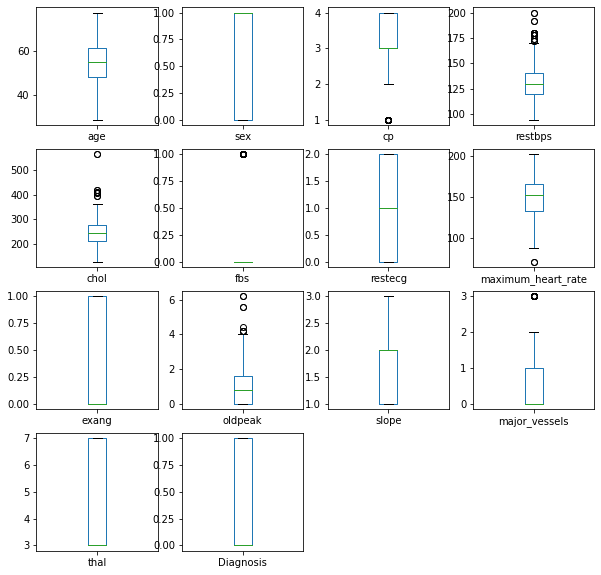

In [12]:
data.plot(kind='box',subplots=True,figsize=(10,10),layout=(4,4))
plt.show()

<AxesSubplot:xlabel='sex', ylabel='chol'>

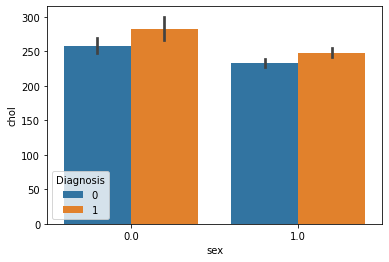

In [11]:
sns.barplot(data=data,x='sex',y='chol',hue='Diagnosis')

# Data Preprocessing

In [ ]:
data.isnull().any().sum()

In [ ]:
heart_data=data.dropna()
heart_data.shape

In [ ]:
data1=heart_data
data1.head()

In [ ]:
data2=pd.get_dummies(data1,prefix=None, prefix_sep='_', dummy_na=False, columns=['cp','restecg','slope','major_vessels','thal'])

In [ ]:
data2.columns

In [ ]:
data2.shape

In [ ]:
data3=data2.drop(['sex','Diagnosis', 'fbs','exang','cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
                  'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'slope_1.0', 'slope_2.0',
       'slope_3.0', 'major_vessels_0.0', 'major_vessels_1.0','major_vessels_2.0',
                  'major_vessels_3.0', 'thal_3.0', 'thal_6.0',
       'thal_7.0'],axis=1) 

In [ ]:
data3.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
names = data3.columns
scaler = MinMaxScaler(feature_range=(0,1))
data4 = scaler.fit_transform(data3)
data4 = pd.DataFrame(data4, columns=names)

In [ ]:
data5=data2.drop(['age','restbps','chol','maximum_heart_rate','oldpeak'],axis=1)

In [ ]:
data4.shape,data5.shape

In [ ]:
data4.columns

In [ ]:
data5.columns

In [ ]:
print(type(data5))
print(type(data4))

In [ ]:
data4.reset_index(drop=True, inplace=True)
data5.reset_index(drop=True, inplace=True)
df = pd.concat([data4, data5], axis=1)

In [ ]:
df.shape

In [ ]:
count = df.Diagnosis.value_counts()
count

In [ ]:
df.describe()

In [ ]:
df['sex'] = df['sex'].apply(pd.to_numeric)

In [ ]:
df.dtypes

In [ ]:
count.plot(kind='bar')
plt.title("Absence(0) and Presence(1) of Heart disease ")
plt.xlabel("Diagnosis")
plt.ylabel("count")
#heart_data.hist("Diagnosis")

In [ ]:
x=df.drop('Diagnosis',axis=1) #independent variable
y=df['Diagnosis']         #dependent variable/output

In [ ]:
x.shape, y.shape

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
print('x_train',x_train.shape)
print('x_test ',x_test.shape)
print('y_train',y_train.shape)
print('y_test ',y_test.shape)

# Modeling

In [ ]:
names=[] 
score=[]
error=[]
prec=[]
recall=[]
crossval=[]
spec=[]

# Logistic Regression

In [ ]:
tuned_parameter=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
model_LR=GridSearchCV(LogisticRegression(),tuned_parameter,scoring='precision',n_jobs=-1,cv=10)
model_LR.fit(x_train,y_train)
print(model_LR.best_estimator_)
print('precision:- ',model_LR.score(x_test,y_test))

In [ ]:
y_pred=model_LR.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_LR.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
names.append("model_LR")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)
print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
print("Specificity of logistic regression:- ",Specificity) #recall
prec.append(precision)
recall.append(sensitivity)
spec.append(Specificity)

In [ ]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_LR,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',accuracy.mean()) #mean of 10 accuracies of accuracies vector
print('std-dev: ',accuracy.std())  #standard deviation
crossval.append(accuracy.mean())

# K-NN

In [ ]:
params = {'n_neighbors':[i for i in range(1,35,2)]}
model_knn=GridSearchCV(KNeighborsClassifier(),params,scoring='precision',cv=10,n_jobs=-1)
model_knn.fit(x_train,y_train)
print(model_knn.best_estimator_)
print(model_knn.score(x_test,y_test))

In [ ]:
y_pred=model_knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of  KNN\n",classification_report(y_test,y_pred))
names.append("model_knn")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
Specificity=TN/float(TN+FP)
print("precision of KNN:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
print("Specificity of KNN:- ",Specificity) #recall
prec.append(precision)
recall.append(sensitivity)
spec.append(Specificity)

In [ ]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_knn,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',accuracy.mean()) #mean of 10 accuracies of accuracies vector
print('std-dev: ',accuracy.std())  #standard deviation
crossval.append(accuracy.mean())

# SVM

In [ ]:
parameter=[{'C':[10**-4,10**-2,10**0,10**2,10**4]}]
model_svm=GridSearchCV(SVC(),parameter,scoring='precision',n_jobs=-1,cv=10)
model_svm.fit(x_train,y_train)
print(model_svm.best_estimator_)
print(model_svm.score(x_test,y_test))

In [ ]:
y_pred=model_svm.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Svm\n",classification_report(y_test,y_pred))
names.append("model_svm")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of SVM:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_svm,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

# Naive Bayes

In [ ]:
model_nb=BernoulliNB()
model_nb.fit(x_train,y_train)

In [ ]:
y_pred=model_nb.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
names.append("model_nb")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Naive_bayes:- ",precision) 
print("sensitivity of Naive_bayes:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_nb,X=x_train,y=y_train,cv=10) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

# Random Forest

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
print(random_grid)

In [ ]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train, y_train)

In [ ]:
y_pred=model_rf.predict(x_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
names.append("model_rf")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
error.append(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Random Forest:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
prec.append(precision)
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#cv=10 fold cross-validation
accuracy=cross_val_score(estimator=model_rf,X=x_train,y=y_train,cv=3) 
print('mean acc:- ',round(accuracy.mean(),5)*100,'%') #mean of 10 accuracies of accuracies vector
print('std-dev: ',round(accuracy.std(),5)*100,'%')  #standard deviation
crossval.append(accuracy.mean())

# Plot Result

In [ ]:
plt.title("Comparison of various Models using Cross validation\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('performance% ')

In [ ]:
plt.figure(figsize=(6,4))
plt.ylim([0.0,1])
plt.plot(names,score,'-o',label="Accuracy",color='blue')
#plt.plot(names,error,'-d',label="Error",color='black')
plt.xlabel("Models")
plt.ylabel("Evaluation Parameters %")
plt.grid(True)
plt.legend()
plt.title("Comparison of accuracy of various Models\n",fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
plt.ylim([0.0,1])
#plt.plot(names,prec,'-o',label="Precision",color='blue')
plt.plot(names,recall,'-d',label="Recall",color='blue')
plt.xlabel("Models")
plt.ylabel("Evaluation Parameters %")
plt.grid(True)
plt.legend()
plt.title("Recall/Sensitivity of various Models\n",fontweight="bold")
plt.show()

In [ ]:
plt.title("Comparison of Sensitvity/Recall of various Models\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

In [ ]:
plt.title("Comparison of Specificity/TNR of various Models\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(names,spec,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')

# Feature Selection

# Chi2 

In [ ]:
name=[]
sens=[]
score=[]
spec=[]

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
fscore=chi2(x_train,y_train)

In [ ]:
p_value=pd.Series(fscore[1],index=x_train.columns)
p_value.sort_values(ascending=True,inplace=True)

In [ ]:
p_value

In [ ]:
p_value.plot.bar()

In [ ]:
x_train_chi2=x_train[['cp_4.0','thal_7.0','exang','thal_3.0','major_vessels_0.0','slope_1.0','slope_2.0','cp_3.0','cp_2.0'
                  ,'major_vessels_1.0','major_vessels_2.0','oldpeak','sex','major_vessels_3.0','restecg_0.0','restecg_2.0']]
x_test_chi2=x_test[['cp_4.0','thal_7.0','exang','thal_3.0','major_vessels_0.0','slope_1.0','slope_2.0','cp_3.0','cp_2.0'
                  ,'major_vessels_1.0','major_vessels_2.0','oldpeak','sex','major_vessels_3.0','restecg_0.0','restecg_2.0']]

In [ ]:
#Logistic Regression(Using Chi2) 

In [ ]:
model_LR=LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
model_LR.fit(x_train_chi2,y_train)

In [ ]:
y_pred=model_LR.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_LR.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
name.append("model_LR")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of logistic regression:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#K-NN(Using Chi2)

In [ ]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train_chi2,y_train)

In [ ]:
y_pred=model_knn.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Log-Reg \n",classification_report(y_test,y_pred))
name.append("model_knn")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of KNN:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of KNN:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#SVM(Using Chi2)

In [ ]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
model_svm.fit(x_train_chi2,y_train)

In [ ]:
y_pred=model_svm.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print(cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Svm\n",classification_report(y_test,y_pred))
name.append("model_svm")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of SVM:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#Naive Bayes(Using Chi2)

In [ ]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train_chi2,y_train)

In [ ]:
y_pred=model_nb.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
name.append("model_nb")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Naive_bayes:- ",precision) 
print("sensitivity of Naive_bayes:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec.append(Specificity)

In [ ]:
#Random Forest(Using Chi2)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train_chi2, y_train)

In [ ]:
y_pred=model_rf.predict(x_test_chi2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train_chi2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
name.append("model_rf")
score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
precision=TP/float(TP+FP)
sensitivity=TP/float(TP+FN)
print("precision of Random Forest:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
sens.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec.append(Specificity)

# Plot Chi2 Result

In [ ]:
plt.title("Comparison of Sensitvity/Recall of various Models using chi2 method\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(name,sens,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity%')

In [ ]:
plt.title("Comparison of Specificity/TNR of various Models using chi2 method\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(name,spec,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity%')

# Wrapper Method

In [ ]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

# Step Forward Selction Method 

In [ ]:
model=[]
recall=[]
spec1=[]

In [ ]:
# Logistic Regression (Step Forward)

In [ ]:
sfs=SFS(LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False),
        k_features=(1,25), forward=True, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sfs.k_feature_names_)
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2.shape

In [ ]:
x_train2 = pd.DataFrame(x_train2)

In [ ]:
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
clf = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False)
#clf.fit(x_train.iloc[:, feat_cols].values, y_train)
clf.fit(x_train2, y_train)
y_train_pred = clf.predict(x_train2)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))
y_test_pred = clf.predict(x_test2)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,clf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_test_pred),5)*100,'%')
print("classification report of Logistic regression\n",classification_report(y_test,y_test_pred))
model.append("model_lr")
#score.append(accuracy_score(y_test,y_test_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Logistic Regression:- ",Specificity) #recall
spec1.append(Specificity)

In [ ]:
#KNN (Step Forward)

In [ ]:
sfs=SFS(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
        k_features=(1,25), forward=True, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train2,y_train)

In [ ]:
y_pred=model_knn.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
model.append("model_k-NN")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of KNN:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of K-NN:- ",Specificity) #recall
spec1.append(Specificity)

In [ ]:
# SVM (Step Forward)

In [ ]:
sfs=SFS(SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

model_svm.fit(x_train2,y_train)

In [ ]:
y_pred=model_svm.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of SVM\n",classification_report(y_test,y_pred))
model.append("model_svm")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec1.append(Specificity)

In [ ]:
# Naive Bayes (Step Forward)

In [ ]:
sfs=SFS(BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train2,y_train)

In [ ]:
y_pred=model_nb.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
model.append("model_nb")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Naive Bayes:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec1.append(Specificity)

In [ ]:
# Random Forest (Step Forward)

In [ ]:
sfs=SFS(RandomForestClassifier(random_state=42),
        k_features=(1,25), forward=True, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sfs.k_feature_names_)
sfs.k_feature_names_
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)
print(sfs.k_score_)
#sfs.k_feature_names_.value_counts()

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train2, y_train)

In [ ]:
y_pred=model_rf.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
model.append("model_rf")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
recall.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec1.append(Specificity)

# Plot Step Forward Selection Result

In [ ]:
plt.title("Comparison of Sensitvity/Recall of various Models using Step forward selection\n",fontweight="bold")
plt.ylim([0.60,1.0])
plt.bar(model,recall,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

In [ ]:
plt.title("Comparison of Specificity/TNR of various Models using Step forward selection\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(model,spec1,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')

# Step Backward Selection method

In [ ]:
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 

In [ ]:
models=[]
sen=[]
spec2=[]

In [ ]:
#Logistic Regression (Step Backward)

In [ ]:
sbs=SFS(LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False),
        k_features=(1,25), forward=False, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
clf = LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1,  max_iter=100,
                    n_jobs=None, penalty='l2',
                   random_state=42, tol=0.0001, verbose=0,
                   warm_start=False)
#clf.fit(x_train.iloc[:, feat_cols].values, y_train)
clf.fit(x_train2, y_train)
y_train_pred = clf.predict(x_train2)
print('Training accuracy on selected features: %.3f' % accuracy_score(y_train, y_train_pred))
y_test_pred = clf.predict(x_test2)
print('Testing accuracy on selected features: %.3f' % accuracy_score(y_test, y_test_pred))

In [ ]:
cm=confusion_matrix(y_test,y_test_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,clf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_test_pred),5)*100,'%')
print("classification report of Logistic regression\n",classification_report(y_test,y_test_pred))
models.append("model_lr")
#score.append(accuracy_score(y_test,y_test_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of logistic regression:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of logistic regression:- ",Specificity) #recall
spec2.append(Specificity)

In [ ]:
#K-NN(Step Backward)

In [ ]:
sbs=SFS(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
        k_features=(1,25), forward=False, floating=False, verbose=2,
        scoring='accuracy',cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_knn=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
model_knn.fit(x_train2,y_train)

In [ ]:
y_pred=model_knn.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_knn.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
models.append("model_k-NN")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of K-NN:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of K-NN:- ",Specificity) #recall
spec2.append(Specificity)

In [ ]:
#SVM (Step Backward)

In [ ]:
sbs=SFS(SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_svm=SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001,
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

model_svm.fit(x_train2,y_train)

In [ ]:
y_pred=model_svm.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_svm.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of SVM\n",classification_report(y_test,y_pred))
models.append("model_svm")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of SVM:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of SVM:- ",Specificity) #recall
spec2.append(Specificity)

In [ ]:
#Naive Bayes (Step Backward)

In [ ]:
sbs=SFS(BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
model_nb=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
model_nb.fit(x_train2,y_train)

In [ ]:
y_pred=model_nb.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_nb.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Naive Bayes\n",classification_report(y_test,y_pred))
models.append("model_nb")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Naive Bayes:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Naive Bayes:- ",Specificity) #recall
spec2.append(Specificity)

In [ ]:
#Random Forest Regression (Step Backward)

In [ ]:
sbs=SFS(RandomForestClassifier(random_state=42),
        k_features=(1,25), forward=False, floating=False,verbose=2,
        scoring='accuracy', cv=4, n_jobs=-1).fit(x_train,y_train)

In [ ]:
print(sbs.k_feature_names_)
feat_cols = list(sbs.k_feature_idx_)
print(feat_cols)
print(sbs.k_score_)

In [ ]:
x_train1=x_train.to_numpy()
x_test1=x_test.to_numpy()

In [ ]:
x_train2=x_train1[:, feat_cols]
x_train2 = pd.DataFrame(x_train2)
x_test2=x_test1[:, feat_cols]
x_test2.shape

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False]# Method of selecting samples for training each tree

In [ ]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
model_rf = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
model_rf.fit(x_train2, y_train)

In [ ]:
y_pred=model_rf.predict(x_test2)
cm=confusion_matrix(y_test,y_pred)
TN = cm[0, 0]
TP = cm[1, 1]
FN = cm[1, 0]
FP = cm[0, 1]
print("Confusion matrix:\n",cm)
print("Train Accuracy :",round(accuracy_score(y_train,model_rf.predict(x_train2)),5)*100,'%')
print("Test Accuracy  :",round(accuracy_score(y_test,y_pred),5)*100,'%')
print("classification report of Random Forest\n",classification_report(y_test,y_pred))
models.append("model_rf")
#score.append(accuracy_score(y_test,y_pred))
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

In [ ]:
sensitivity=TP/float(TP+FN)
#print("precision of logistic regression:- ",precision) 
print("sensitivity of Random Forest:- ",sensitivity) #recall
sen.append(sensitivity)
Specificity=TN/float(TN+FP)
print("Specificity of Random Forest:- ",Specificity) #recall
spec2.append(Specificity)

# Plot Step Backward Selection Result

In [ ]:
plt.title("Comparison of Sensitvity/Recall of various Models using Step Backward selection\n",fontweight="bold")
plt.ylim([0.60,1.0])
plt.bar(models,sen,width=0.5)
plt.xlabel('Model')
plt.ylabel('Sensitvity% ')

In [ ]:
plt.title("Comparison of Specificity/TNR of various Models using Step Backward selection\n",fontweight="bold")
plt.ylim([0.70,1.0])
plt.bar(models,spec2,width=0.5)
plt.xlabel('Model')
plt.ylabel('Specificity% ')